# PedSilicoICH: Part 2. Scanners

This notebook also introduces concepts of the `Scanners` Class, and assumes familiarity with the [01_phantoms.ipynb](01_phantoms.ipynb) notebook and continues from it.

In [26]:
%pip install --upgrade pip -q
%pip install torchvision -q
%pip install seaborn -q
%pip install matplotlib -q
%pip install ipywidgets -q

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [27]:
from pathlib import Path

import pandas as pd
from torchvision.datasets.utils import download_and_extract_archive

base_dir = Path('data')

if not base_dir.exists():
    url ='https://zenodo.org/records/11267694/files/pediatricIQphantoms.zip'
    download_and_extract_archive(url, download_root=base_dir)
base_dir = base_dir / 'pediatricIQphantoms'

meta = pd.read_csv(base_dir / 'metadata.csv')
meta = meta[meta['series'] == 'ground truth']
meta.file = meta.file.apply(lambda o: base_dir.absolute() / o)
meta

,Name,effective diameter [cm],age [year],pediatric subgroup,phantom,scanner,Dose [%],recon,kernel,FOV [cm],file,patientid,studyid,series,repeat
39,11.2 cm CTP404,11.2,0.083333,newborn,CTP404,Siemens Somatom Definition,NaN,ground truth,NaN,12.3,/home/brandon.nelson/Dev/VITools/notebooks/dat...,0.0,2,ground truth,0
80,13.1 cm CTP404,13.1,0.083333,newborn,CTP404,Siemens Somatom Definition,NaN,ground truth,NaN,14.4,/home/brandon.nelson/Dev/VITools/notebooks/dat...,1.0,6,ground truth,0
121,15.0 cm CTP404,15.0,0.083333,newborn,CTP404,Siemens Somatom Definition,NaN,ground truth,NaN,34.0,/home/brandon.nelson/Dev/VITools/notebooks/dat...,2.0,10,ground truth,0
162,15.1 cm CTP404,15.1,0.083333,newborn,CTP404,Siemens Somatom Definition,NaN,ground truth,NaN,16.6,/home/brandon.nelson/Dev/VITools/notebooks/dat...,3.0,14,ground truth,0
203,18.5 cm CTP404,18.5,2.000000,infant,CTP404,Siemens Somatom Definition,NaN,ground truth,NaN,20.4,/home/brandon.nelson/Dev/VITools/notebooks/dat...,4.0,18,ground truth,0
244,21.6 cm CTP404,21.6,12.000000,child,CTP404,Siemens Somatom Definition,NaN,ground truth,NaN,23.8,/home/brandon.nelson/Dev/VITools/notebooks/dat...,5.0,22,ground truth,0
285,29.2 cm CTP404,29.2,21.000000,adolescent,CTP404,Siemens Somatom Definition,NaN,ground truth,NaN,32.1,/home/brandon.nelson/Dev/VITools/notebooks/dat...,6.0,26,ground truth,0
326,35.0 cm CTP404,35.0,39.000000,adult,CTP404,Siemens Somatom Definition,NaN,ground truth,NaN,38.5,/home/brandon.nelson/Dev/VITools/notebooks/dat...,7.0,30,ground truth,0
728,11.2 cm MITA-LCD,11.2,0.083333,newborn,MITA-LCD,Siemens Somatom Definition,NaN,ground truth,NaN,12.0,/home/brandon.nelson/Dev/VITools/notebooks/dat...,8.0,34,ground truth,0
1130,13.1 cm MITA-LCD,13.1,0.083333,newborn,MITA-LCD,Siemens Somatom Definition,NaN,ground truth,NaN,14.0,/home/brandon.nelson/Dev/VITools/notebooks/dat...,9.0,38,ground truth,0


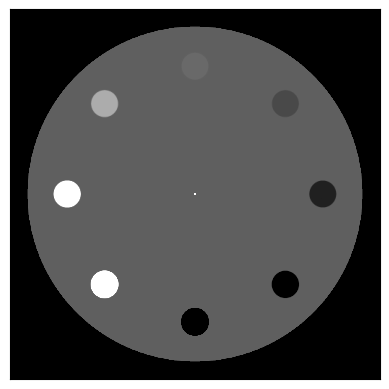

In [28]:
import numpy as np
import pydicom

from VITools import Phantom

from utils import ctshow

fname = meta.iloc[0]['file']

dcm = pydicom.read_file(fname)
spacings = tuple(map(float, (dcm.SliceThickness, *dcm.PixelSpacing)))

phantom_len_mm = 30  # in mm
slices = phantom_len_mm / spacings[0]
img = dcm.pixel_array + int(dcm.RescaleIntercept)
img = np.repeat(img[None], int(slices), axis=0)

phantom = Phantom(img, spacings)
ctshow(phantom.get_CT_number_phantom())

In [29]:
phantom


        phantom class: Phantom
        age [yrs]: 0
        shape [voxels]: [124, 512, 512]
        size [mm]: [ 29.7890625 123.        123.       ]
        

## Define the scanner that will image the patient phantom

In [30]:
from VITools import Scanner
Scanner?

Init signature:
Scanner(
    phantom: VITools.phantoms.Phantom,
    studyname: str = 'default',
    studyid: int = 0,
    seriesname: str = 'default',
    seriesid=0,
    framework: str = 'CATSIM',
    output_dir: str | pathlib.Path = None,
    materials: dict | None = None,
) -> None
Docstring:     
A class to hold CT simulation data and run simulations

:param phantom: Phantom class instance to be scanned, voxels in units of
    approximate CT Numbers [HU], typically in python
    coordinates (z, x, y)
    where z is perpendicular to the axial plane made by x and y.
    See <https://en.wikipedia.org/wiki/Hounsfield_scale>
    for some suggested values for common materials

:param studyname: str, study identifier to be saved in DICOM header
:param studyid: int, study identifier to be saved in DICOM header
:param seriesname: str, series identifier to be saved in DICOM header
:param seriesid: int, series identifier to be saved in DICOM header
:param output_dir: optional directory to sav

In [31]:
scanner = Scanner(phantom)
scanner

Initializing Scanner object...
----------
*
*********************************************
* DICOM dataset information:
* Patient age: 000Y, sex: O
* Scanner: GE MEDICAL SYSTEMS RHAPSODE
* Study date & desciption: 20040119, e+1
* Technique: 120 kVp, 170 mA
* Reconstruction: STANDARD kernel, 338.671600-mm FOV
* Image: 0.240234375-mm pixels (XY), 0.240234375-mm slices (Z)
*********************************************
*
*********************************************
* Segmentation parameters:
* Using thresholds specified in the config file.
* Materials: ['ncat_adipose', 'ncat_water', 'ncat_brain', 'ncat_skull']
* mu values (/cm): [0.18, 0.21, 0.21, 0.46]
* mu(water) (/cm): 0.21
* Thresholds (/cm): [0.16, 0.2, 0.21, 0.27]
* Thresholds (HU): [-200.0, -10.0, 10.0, 300.0]
*********************************************
* Calculating volume fraction maps for 4 materials and 124 slices...
* Writing volume fraction files for 4 materials and 124 slices, plus the HU data...
* Writing default/phantoms/


        <class 'VITools.image_acquisition.Scanner'> default
        Scanner: CATSIM
        

## Use `scanner.scout_view()` to determine scan range

Here we use the `phantom._lesion_coords` attribute to center the scan around the lesion location to update the center and number of `scans` to the desired scan length

In [32]:
startZ, endZ

(-3.5, 3.5)

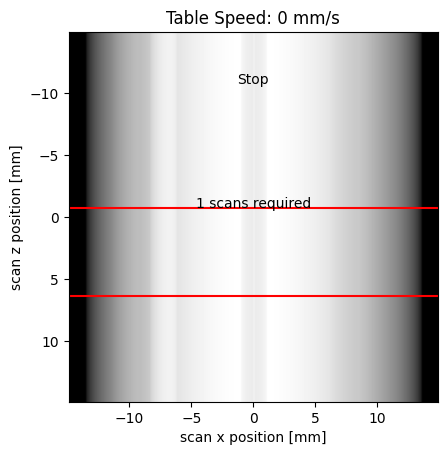

In [33]:
scans = 1  # edit me

center = 0
scan_width = 7
width = scan_width*scans
startZ = center - width / 2
endZ = center + width / 2

scanner.scout_view(startZ, endZ)

In [34]:
acquisition_technique = dict(
    mA=200,
    kVp=120,
    views=500,
    startZ=startZ,
    endZ=endZ
)
scanner.run_scan(**acquisition_technique)

scan: 1/1
Airscan
Offset scan
Phantom scan


  0%|          | 0/500 [00:00<?, ?it/s]

in C> Preparing to allocate memory for material volume data...
in C> Allocated memory for image volume for material  1
in C> Copying data for material  1 into C memory...in C>  done.
in C> Allocated memory for image volume for material  2
in C> Copying data for material  2 into C memory...in C>  done.
in C> Allocated memory for image volume for material  3
in C> Copying data for material  3 into C memory...in C>  done.
in C> Allocated memory for image volume for material  4
in C> Copying data for material  4 into C memory...in C>  done.
in C> Allocated a total of    496 MB.


100%|██████████| 500/500 [10:45<00:00,  1.29s/it]


Prep view
Applying LSC...done.

Applying Beam Hardening Correction (ACCURATE BHC)...Airscan
done.

Simulation is done.



        <class 'VITools.image_acquisition.Scanner'> default
        Scanner: CATSIM
        

In [35]:
phantom.size[-1]

123.0

In [36]:
recon_technique = dict(
    kernel='standard',
    fov=150,
    sliceThickness=1
)
scanner.run_recon(**recon_technique)

0.02
-1
0.02
fov size: 150
* Loading the projection data...
* Pre-weighting the filter...
* Applying the filter...


* Running the reconstruction...
* Converting projection data from a numpy array to a C array...
* Allocating a C array for the recon results...
* In C...
* Converting the recon results from a C array to a numpy array...
* Scaling recon data...



        <class 'VITools.image_acquisition.Scanner'> default
        Scanner: CATSIM
        
Recon: (7, 512, 512) 15.0 cm fov
Projections: (500, 16, 900)

## View the result

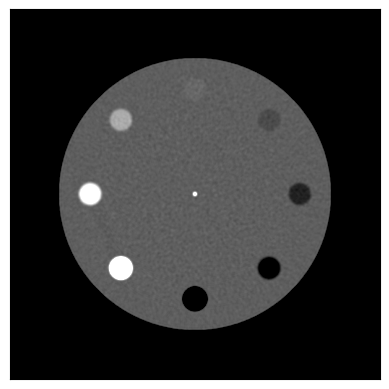

In [37]:
ctshow(scanner.recon)

In [38]:
scanner.write_to_dicom('CTP404/CTP404.dcm')

[PosixPath('CTP404/CTP404_000.dcm'),
 PosixPath('CTP404/CTP404_001.dcm'),
 PosixPath('CTP404/CTP404_002.dcm'),
 PosixPath('CTP404/CTP404_003.dcm'),
 PosixPath('CTP404/CTP404_004.dcm'),
 PosixPath('CTP404/CTP404_005.dcm'),
 PosixPath('CTP404/CTP404_006.dcm')]

In [ ]:
mAs = [20, 80, 320]
mA_recons = []
for mA in mAs:
    scanner.run_scan(mA=mA, startZ=startZ, endZ=endZ, views=500)
    scanner.run_recon(sliceThickness=1, kernel='soft')
    mA_recons.append(scanner.recon)

scan: 1/1
Airscan
Offset scan
Phantom scan


  0%|          | 0/500 [00:00<?, ?it/s]

in C> Preparing to allocate memory for material volume data...
in C> Allocated memory for image volume for material  1
in C> Copying data for material  1 into C memory...in C>  done.
in C> Allocated memory for image volume for material  2
in C> Copying data for material  2 into C memory...in C>  done.
in C> Allocated memory for image volume for material  3
in C> Copying data for material  3 into C memory...in C>  done.
in C> Allocated memory for image volume for material  4
in C> Copying data for material  4 into C memory...in C>  done.
in C> Allocated a total of    496 MB.


100%|██████████| 500/500 [10:34<00:00,  1.27s/it]


Prep view
Applying LSC...done.

Applying Beam Hardening Correction (ACCURATE BHC)...Airscan
done.

Simulation is done.
0.02
-1
0.02
fov size: 150
* Loading the projection data...
* Pre-weighting the filter...
* Applying the filter...
* Running the reconstruction...
* Converting projection data from a numpy array to a C array...
* Allocating a C array for the recon results...
* In C...
* Converting the recon results from a C array to a numpy array...
* Scaling recon data...
scan: 1/1
Airscan
Offset scan
Phantom scan


  0%|          | 0/500 [00:00<?, ?it/s]

in C> Preparing to allocate memory for material volume data...
in C> Allocated memory for image volume for material  1
in C> Copying data for material  1 into C memory...in C>  done.
in C> Allocated memory for image volume for material  2
in C> Copying data for material  2 into C memory...in C>  done.
in C> Allocated memory for image volume for material  3
in C> Copying data for material  3 into C memory...in C>  done.


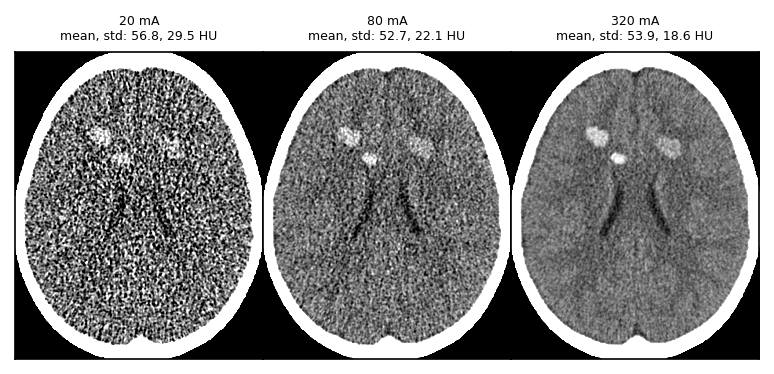

In [ ]:
import sys
sys.path.append('..')
from utils import ctshow, center_crop
import matplotlib.pyplot as plt

f, axs = plt.subplots(1, len(mA_recons), gridspec_kw=dict(wspace=0, hspace=0), dpi=150)
for ax, recon, mA in zip(axs.flatten(), mA_recons, mAs):
    ctshow(center_crop(recon[0]), 'brain', fig=f, ax=ax)
    lesion_roi = recon[lesion_mask]
    mean = lesion_roi.mean()
    std = lesion_roi.std()
    ax.set_title(f'{mA} mA\nmean, std: {mean:2.1f}, {std:2.1f} HU', fontsize=6)

In [ ]:
kVps = [80, 100, 120, 140]
kVp_recons = []
for kVp in kVps:
    mA = 200 * (120 / kVp)**2 # accounts for the fact that tube output scales by kVp^2
    print(f'{kVp} kVp, {mA} mA')
    scanner.run_scan(kVp=kVp, mA=mA, startZ=startZ, endZ=endZ, views=500)
    scanner.run_recon(sliceThickness=1, kernel='soft')
    kVp_recons.append(scanner.recon)

80 kVp, 450.0 mA
scan: 1/1
Airscan
Offset scan
Phantom scan


  0%|          | 0/500 [00:00<?, ?it/s]

in C> Preparing to allocate memory for material volume data...
in C> Allocated memory for image volume for material  1
in C> Copying data for material  1 into C memory...in C>  done.
in C> Allocated memory for image volume for material  2
in C> Copying data for material  2 into C memory...in C>  done.
in C> Allocated memory for image volume for material  3
in C> Copying data for material  3 into C memory...in C>  done.
in C> Allocated memory for image volume for material  4
in C> Copying data for material  4 into C memory...in C>  done.
in C> Allocated a total of    132 MB.


 51%|█████▏    | 257/500 [00:59<00:57,  4.23it/s]

100%|██████████| 500/500 [01:53<00:00,  4.41it/s]


Prep view
Applying LSC...done.

Applying Beam Hardening Correction (ACCURATE BHC)...Airscan
done.

Simulation is done.
0.02
-1
0.02
fov size: 250
* Loading the projection data...
* Pre-weighting the filter...
* Applying the filter...
* Running the reconstruction...
* Converting projection data from a numpy array to a C array...
* Allocating a C array for the recon results...
* In C...
* Converting the recon results from a C array to a numpy array...
* Scaling recon data...
100 kVp, 288.0 mA
scan: 1/1
Airscan
Offset scan
Phantom scan


  0%|          | 0/500 [00:00<?, ?it/s]

in C> Preparing to allocate memory for material volume data...
in C> Allocated memory for image volume for material  1
in C> Copying data for material  1 into C memory...in C>  done.
in C> Allocated memory for image volume for material  2
in C> Copying data for material  2 into C memory...in C>  done.
in C> Allocated memory for image volume for material  3
in C> Copying data for material  3 into C memory...in C>  done.
in C> Allocated memory for image volume for material  4
in C> Copying data for material  4 into C memory...in C>  done.
in C> Allocated a total of    132 MB.


100%|██████████| 500/500 [01:54<00:00,  4.35it/s]


Prep view
Applying LSC...done.

Applying Beam Hardening Correction (ACCURATE BHC)...Airscan
done.

Simulation is done.
0.02
-1
0.02
fov size: 250
* Loading the projection data...
* Pre-weighting the filter...
* Applying the filter...
* Running the reconstruction...
* Converting projection data from a numpy array to a C array...
* Allocating a C array for the recon results...
* In C...
* Converting the recon results from a C array to a numpy array...
* Scaling recon data...
120 kVp, 200.0 mA
scan: 1/1
Airscan
Offset scan
Phantom scan


  0%|          | 0/500 [00:00<?, ?it/s]

in C> Preparing to allocate memory for material volume data...
in C> Allocated memory for image volume for material  1
in C> Copying data for material  1 into C memory...in C>  done.
in C> Allocated memory for image volume for material  2
in C> Copying data for material  2 into C memory...in C>  done.
in C> Allocated memory for image volume for material  3
in C> Copying data for material  3 into C memory...in C>  done.
in C> Allocated memory for image volume for material  4
in C> Copying data for material  4 into C memory...in C>  done.
in C> Allocated a total of    132 MB.


100%|██████████| 500/500 [01:52<00:00,  4.45it/s]


Prep view
Applying LSC...done.

Applying Beam Hardening Correction (ACCURATE BHC)...Airscan
done.

Simulation is done.
0.02
-1
0.02
fov size: 250
* Loading the projection data...
* Pre-weighting the filter...
* Applying the filter...
* Running the reconstruction...
* Converting projection data from a numpy array to a C array...
* Allocating a C array for the recon results...
* In C...
* Converting the recon results from a C array to a numpy array...
* Scaling recon data...
140 kVp, 146.93877551020407 mA
scan: 1/1
Airscan
Offset scan
Phantom scan


  0%|          | 0/500 [00:00<?, ?it/s]

in C> Preparing to allocate memory for material volume data...
in C> Allocated memory for image volume for material  1
in C> Copying data for material  1 into C memory...in C>  done.
in C> Allocated memory for image volume for material  2
in C> Copying data for material  2 into C memory...in C>  done.
in C> Allocated memory for image volume for material  3
in C> Copying data for material  3 into C memory...in C>  done.
in C> Allocated memory for image volume for material  4
in C> Copying data for material  4 into C memory...in C>  done.
in C> Allocated a total of    132 MB.


100%|██████████| 500/500 [01:58<00:00,  4.23it/s]


Prep view
Applying LSC...done.

Applying Beam Hardening Correction (ACCURATE BHC)...Airscan
done.

Simulation is done.
0.02
-1
0.02
fov size: 250
* Loading the projection data...
* Pre-weighting the filter...
* Applying the filter...
* Running the reconstruction...
* Converting projection data from a numpy array to a C array...
* Allocating a C array for the recon results...
* In C...
* Converting the recon results from a C array to a numpy array...
* Scaling recon data...


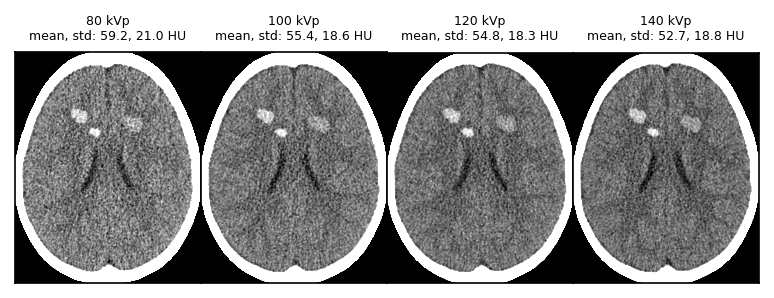

In [ ]:
f, axs = plt.subplots(1, len(kVp_recons), gridspec_kw=dict(wspace=0, hspace=0), dpi=150)
for ax, recon, kVp in zip(axs.flatten(), kVp_recons, kVps):
    ctshow(center_crop(recon[0]), 'brain', fig=f, ax=ax)
    lesion_roi = recon[lesion_mask]
    mean = lesion_roi.mean()
    std = lesion_roi.std()
    ax.set_title(f'{kVp} kVp\nmean, std: {mean:2.1f}, {std:2.1f} HU', fontsize=6)
    

In [ ]:
scanner.run_scan(kVp=120, mA=200, startZ=startZ, endZ=endZ, views=500)

scan: 1/1
Airscan
Offset scan
Phantom scan


  0%|          | 0/500 [00:00<?, ?it/s]

in C> Preparing to allocate memory for material volume data...
in C> Allocated memory for image volume for material  1
in C> Copying data for material  1 into C memory...in C>  done.
in C> Allocated memory for image volume for material  2
in C> Copying data for material  2 into C memory...in C>  done.
in C> Allocated memory for image volume for material  3
in C> Copying data for material  3 into C memory...in C>  done.
in C> Allocated memory for image volume for material  4
in C> Copying data for material  4 into C memory...in C>  done.
in C> Allocated a total of    132 MB.


100%|██████████| 500/500 [02:34<00:00,  3.23it/s]


Prep view
Applying LSC...done.

Applying Beam Hardening Correction (ACCURATE BHC)...Airscan
done.

Simulation is done.



        <class 'pedsilicoICH.image_acquisition.Scanner'> default
        Scanner: CATSIM
        
Recon: (7, 512, 512) 25.0 cm fov
Projections: (500, 16, 900)

In [ ]:
kernels = ['bone', 'standard', 'soft']

recons = []
for kernel in kernels:
    scanner.run_recon(sliceThickness=1, kernel=kernel)
    recons.append(scanner.recon)

0.02
-1
0.02
fov size: 250
* Loading the projection data...
* Pre-weighting the filter...
* Applying the filter...


* Running the reconstruction...
* Converting projection data from a numpy array to a C array...
* Allocating a C array for the recon results...
* In C...
* Converting the recon results from a C array to a numpy array...
* Scaling recon data...
0.02
-1
0.02
fov size: 250
* Loading the projection data...
* Pre-weighting the filter...
* Applying the filter...
* Running the reconstruction...
* Converting projection data from a numpy array to a C array...
* Allocating a C array for the recon results...
* In C...
* Converting the recon results from a C array to a numpy array...
* Scaling recon data...
0.02
-1
0.02
fov size: 250
* Loading the projection data...
* Pre-weighting the filter...
* Applying the filter...
* Running the reconstruction...
* Converting projection data from a numpy array to a C array...
* Allocating a C array for the recon results...
* In C...
* Converting the recon results from a C array to a numpy array...
* Scaling recon data...


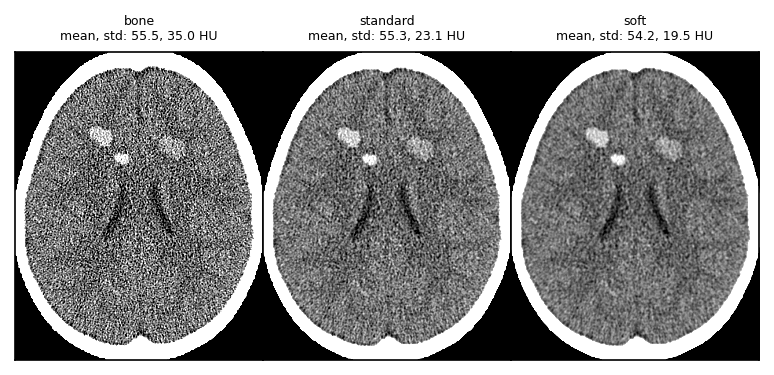

In [ ]:
f, axs = plt.subplots(1, len(recons), gridspec_kw=dict(wspace=0, hspace=0), dpi=150)
for ax, recon, kernel in zip(axs.flatten(), recons, kernels):
    ctshow(center_crop(recon[0]), 'brain', fig=f, ax=ax)
    lesion_roi = recon[lesion_mask]
    mean = lesion_roi.mean()
    std = lesion_roi.std()
    ax.set_title(f'{kernel}\nmean, std: {mean:2.1f}, {std:2.1f} HU', fontsize=6)